In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
pd.read_csv("data/pizzas.csv", sep=";")

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01.01.15,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01.01.15,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01.01.15,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01.01.15,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01.01.15,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31.12.15,21:23:10,"16,75","16,75",M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31.12.15,21:23:10,"17,95","17,95",L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31.12.15,21:23:10,12,12,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31.12.15,22:09:54,"20,25","20,25",L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
pizza_places = pd.read_csv("data/Datafiniti_Pizza_Restaurants_and_the_Pizza_They_Sell_Jun19.csv", sep=",")

In [4]:
pizza_places = pizza_places[['name', 'menus.name', 'province', 'menus.amountMax']]

In [5]:
pizza_places

,name,menus.name,province,menus.amountMax
0,Shotgun Dans Pizza,Cheese Pizza,AR,7.98
1,Sauce Pizza Wine,Pizza Cookie,AZ,6.00
2,Mios Pizzeria,Pizza Blanca,OH,6.49
3,Hungry Howies Pizza,Small Pizza,MI,5.99
4,Spartan Pizzeria,Pizza Sub,MD,5.49
...,...,...,...,...
9995,Carbone's Pizzeria,Super Steak Pizza,NY,37.10
9996,Carbone's Pizzeria,Large Cheese & 1 Item Pizza,NY,10.10
9997,Giordano's Pizza,"Individual 6"" Pepperoni Stuffed Deep Dish Pizza",IL,8.45
9998,Giordano's Pizza,"Individual 6"" Cheese Stuffed Deep Dish Pizza",IL,8.45


In [6]:
pizza_places = pizza_places.rename(columns={"province": "State"})

In [7]:
pizza_grouped = pizza_places.groupby(['State'], group_keys=True).apply(lambda x: x)

In [8]:
pizza_grouped

name               menus.name State  \
State                                                                           
AK    2942                              Guidos    Scampi Alla Pizzaiola    AK   
      3877                   Papa John's Pizza             Cheese Pizza    AK   
      9960                Little Caesars Pizza           2 Large Pizzas    AK   
AL    2718                            Tortugas         Cheese Pizza Sub    AL   
      2719                            Tortugas            Stuffed Pizza    AL   
...                                        ...                      ...   ...   
WV    9638  Kings New York Pizza - Martinsburg             Pizza Burger    WV   
      9639  Kings New York Pizza - Martinsburg  White Pizza with Garlic    WV   
      9640  Kings New York Pizza - Martinsburg              Pizza Steak    WV   
      9641  Kings New York Pizza - Martinsburg          Margarita Pizza    WV   
      9642  Kings New York Pizza - Martinsburg                Pizza Sub    WV   

            menus.amountMax  
State                        
AK    2942            21.00  
      3877            15.99  
      9960            25.99  
AL    2718             4.25  
      2719            31.85  
...                     ...  
WV    9638             6.75  
      9639            14.25  
      9640             7.25  
      9641            18.75  
      9642             7.25  

[10000 rows x 4 columns]

In [9]:
living_cost = pd.read_csv("data/Cost_of_living_index.csv")

In [10]:
living_cost['Location'] = living_cost['City'].apply(lambda x : x.split(","))

In [11]:
living_cost_USA = living_cost[living_cost['Location'].apply(lambda x : x[-1]) == " United States"]

In [12]:
living_cost_USA['State'] = living_cost['Location'].apply(lambda x : x[1])

/tmp/ipykernel_2765438/641307488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  living_cost_USA['State'] = living_cost['Location'].apply(lambda x : x[1])


In [13]:
living_cost_USA.sample(10)

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Location,State
257,258,"Tulsa, OK, United States",62.67,26.87,45.72,59.49,62.36,129.54,"[Tulsa, OK, United States]",OK
178,179,"Tampa, FL, United States",68.61,39.54,54.85,65.38,72.99,140.97,"[Tampa, FL, United States]",FL
139,140,"Buffalo, NY, United States",70.59,29.30,51.04,62.31,72.75,111.16,"[Buffalo, NY, United States]",NY
233,234,"Richmond, VA, United States",64.56,35.24,50.68,63.54,62.47,132.62,"[Richmond, VA, United States]",VA
269,270,"Oklahoma City, OK, United States",61.72,25.72,44.68,60.18,56.84,136.21,"[Oklahoma City, OK, United States]",OK
166,167,"Raleigh, NC, United States",69.18,36.18,53.56,71.88,66.40,155.96,"[Raleigh, NC, United States]",NC
169,170,"Arlington, TX, United States",69.07,30.98,51.04,64.58,62.75,141.64,"[Arlington, TX, United States]",TX
276,277,"Springfield, MO, United States",60.56,18.66,40.73,60.68,61.21,102.88,"[Springfield, MO, United States]",MO
72,73,"Sacramento, CA, United States",75.54,44.29,60.75,69.09,77.91,145.88,"[Sacramento, CA, United States]",CA
283,284,"Reno, NV, United States",59.84,38.03,49.51,51.96,62.27,136.81,"[Reno, NV, United States]",NV


In [14]:
a = living_cost_USA.loc[living_cost_USA['State'] == "NY"]

In [15]:
a

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Location,State


In [16]:
import os  
os.makedirs('data', exist_ok=True)  

# store the living_cost_USA dataset
living_cost_USA.to_csv("data/living_cost_USA.csv")

**Analyse du dataset living_cost_USA**

Preprocessing steps :

-Isolate the United States (using the second element of [City])

-Create the [State] section to facilitate the merge with other datasets.


In [17]:
CoL = living_cost_USA.sort_values(by='Cost of Living Index')

In [18]:
df_CoL = CoL.mean()

/tmp/ipykernel_2765438/2228730943.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_CoL = CoL.mean()


In [19]:
df_CoL

Rank                              156.481818
Cost of Living Index               70.906455
Rent Index                         41.026273
Cost of Living Plus Rent Index     56.762273
Groceries Index                    66.906364
Restaurant Price Index             71.489636
Local Purchasing Power Index      126.717091
dtype: float64

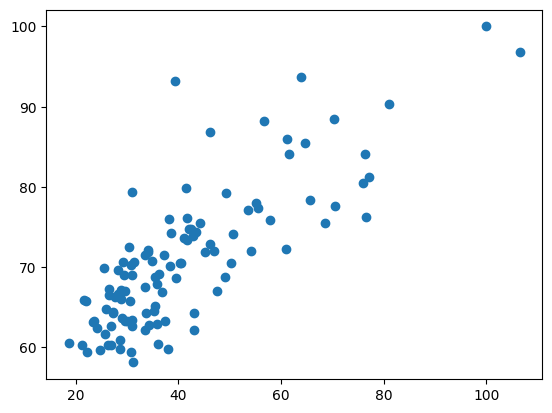

In [20]:
plt.scatter(CoL['Rent Index'], CoL['Cost of Living Index'])

<Axes: xlabel='Local Purchasing Power Index', ylabel='Restaurant Price Index'>

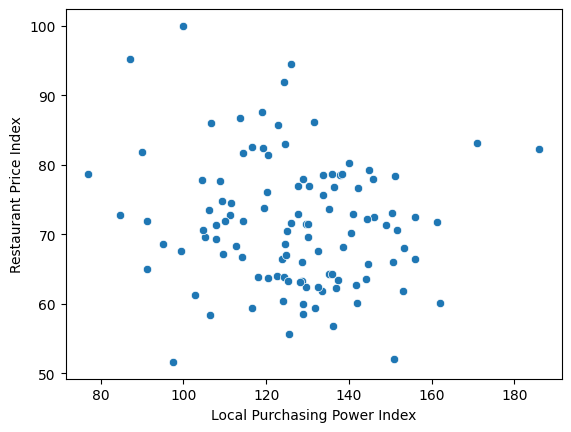

In [21]:
sns.scatterplot(x='Local Purchasing Power Index', y='Restaurant Price Index', data=CoL)

Cost of Living Index	
Rent Index	Cost of Living Plus Rent Index	
Groceries Index	Restaurant Price Index	
Local Purchasing Power Index	

In [22]:
scipy.stats.pearsonr(CoL['Rent Index'], CoL['Cost of Living Index'])    # Pearson's r

PearsonRResult(statistic=0.8025975278280854, pvalue=5.560881495993284e-26)

In [23]:
scipy.stats.pearsonr(CoL['Groceries Index'], CoL['Restaurant Price Index'])    # Pearson's r

PearsonRResult(statistic=0.7045005164938034, pvalue=8.88648941999535e-18)

In [24]:
scipy.stats.pearsonr(CoL['Local Purchasing Power Index'], CoL['Restaurant Price Index'])    # Pearson's r

PearsonRResult(statistic=-0.12981136952418781, pvalue=0.17648825882815058)

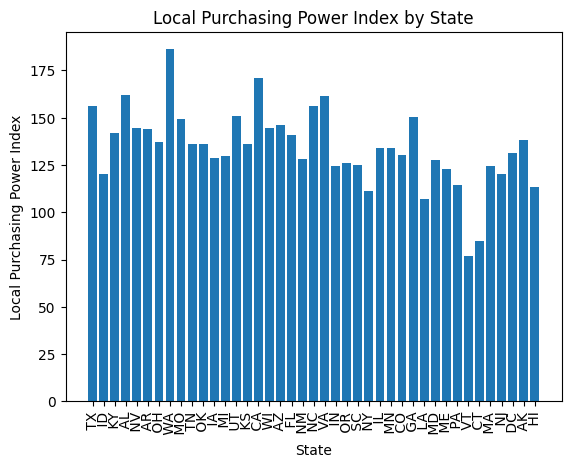

In [25]:
plt.bar(CoL["State"], CoL["Local Purchasing Power Index"])
plt.xlabel('State')
plt.ylabel('Local Purchasing Power Index')
plt.title('Local Purchasing Power Index by State')
plt.xticks(rotation=90)
plt.show()

In [26]:
df = CoL.sort_values(['Cost of Living Index'], ascending=False).reset_index(drop=True)
df['StateInitiales'] = df['State'].copy()
df_state = df.groupby(['State']).mean()

/tmp/ipykernel_2765438/151360437.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_state = df.groupby(['State']).mean()


In [27]:
df2 = df_state.sort_values(['Cost of Living Index'], ascending=False)

In [28]:
df2

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
State,,,,,,,
HI,15.000000,93.720000,63.960000,79.630000,96.320000,86.720000,113.580000
AK,16.000000,93.190000,39.450000,67.750000,96.740000,78.760000,138.380000
DC,18.000000,88.500000,70.280000,79.870000,86.630000,86.230000,131.530000
NJ,29.000000,84.080000,61.580000,73.430000,86.080000,81.440000,120.460000
MA,37.000000,80.460000,76.090000,78.390000,75.710000,83.080000,124.570000
CT,41.000000,79.850000,41.580000,61.730000,83.410000,72.820000,84.710000
NY,90.666667,79.680000,50.956667,66.081667,76.110000,81.040000,98.843333
CA,77.923077,78.033077,62.906154,70.873077,73.527692,81.199231,133.499231
PA,55.000000,77.645000,43.790000,61.625000,73.235000,70.745000,111.810000


In [29]:
# store the living_cost_USA_by_STATE dataset
df2.to_csv("data/living_cost_USA_by_STATE.csv")

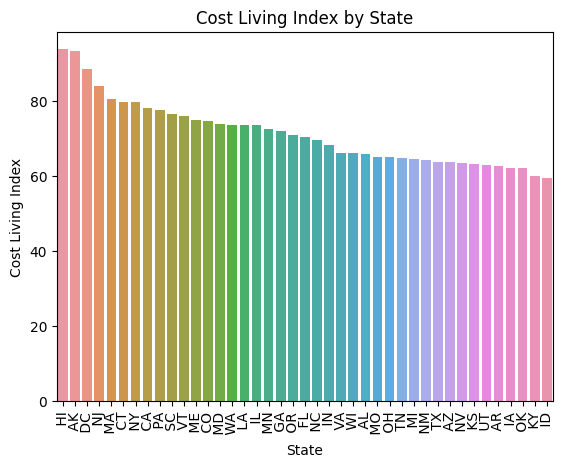

In [30]:
sns.barplot(x=df2.index, y='Cost of Living Index', data=df2, errorbar=None)
plt.xlabel('State')
plt.ylabel('Cost Living Index')
plt.title('Cost Living Index by State')
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
plt.show()